In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

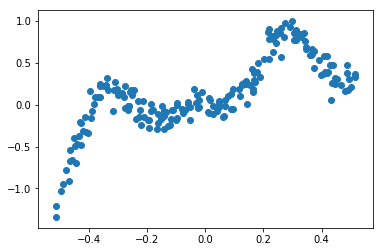

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

In [7]:
class ReluMasked1(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta): # this gives the gradient for weight update in that layer
        ## option 0
#         return ((self.x-output_delta >= 0).astype(float)) * output_delta
        ## option 1
        clipped = np.where(self.x-output_delta >= 0, output_delta, self.x)#+1e-3)
        return ((self.x >= 0).astype(float)) * clipped
        
    

#     def true_backward(self, output_delta): # this gives the true gradient to propagate backward
#         return output_delta
# #         return ((self.x >= 0).astype(float))
        

In [605]:
hidden_size = 2

optimizer = tnn.Adam(learning_rate=0.01)
la1a = tnn.LinearLayer(1, hidden_size, optimizer=optimizer)
activation=tnn.Relu()
# activation=ReluMasked1()
la2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)
net = tnn.AutoForm([la1a, activation, la2a])

In [606]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    yout = net.forward(x_data)
    loss = tnn.MseLoss.loss(yout, y_data)
    dy = tnn.MseLoss.del_loss(yout, y_data)
    
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
#         plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(la2a.input.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
            
        print("Weight 1", '\n', la1a.weights)
        print("Weight 2", '\n', la2a.weights)
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.4618249104442341
Weight 1 
 [[1.93849375 1.17856702]]
Weight 2 
 [[-0.1031741 ]
 [-2.23484102]]


_______________________
epoch 100
Loss 0.04674016634552571
Weight 1 
 [[2.39166601 0.84774169]]
Weight 2 
 [[ 0.41932043]
 [-1.97218482]]


_______________________
epoch 200
Loss 0.03677775688878676
Weight 1 
 [[2.84967022 0.94810369]]
Weight 2 
 [[ 0.57593454]
 [-2.01343994]]


_______________________
epoch 300
Loss 0.0359437994773584
Weight 1 
 [[2.99477552 1.01505881]]
Weight 2 
 [[ 0.61404072]
 [-2.09324322]]


_______________________
epoch 400
Loss 0.03522232416517026
Weight 1 
 [[3.05020028 1.08386934]]
Weight 2 
 [[ 0.62923006]
 [-2.19365737]]


_______________________
epoch 500
Loss 0.034437298365369795
Weight 1 
 [[3.12613805 1.16079982]]
Weight 2 
 [[ 0.64946897]
 [-2.30648842]]


_______________________
epoch 600
Loss 0.033628635402531165
Weight 1 
 [[3.21293401 1.24163493]]
Weight 2 
 [[ 0.67263036]
 [-2.42847888]]


______________________

TclError: invalid command name "pyimage475"

In [607]:
print("Loss ",loss)
print("Weight 1", '\n', la1a.weights)
print("Weight 2", '\n', la2a.weights)

Loss  0.028269895755710907
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


In [608]:
# net.layerList[1] = tnn.Relu()
# net.layerList[1] = ReluMasked1()

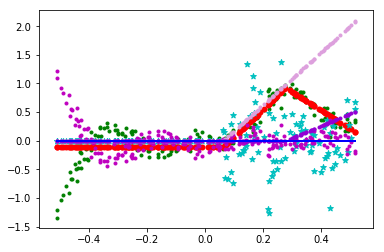

In [609]:
%matplotlib inline        
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
#         plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(la2a.input.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)

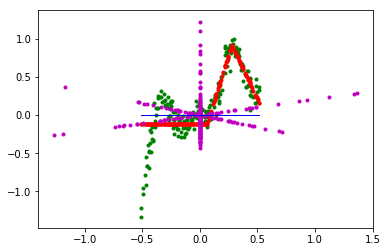

In [610]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=1, label='x,a2')
# plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')

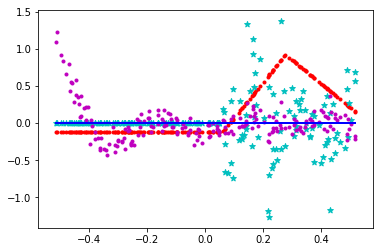

In [611]:
%matplotlib inline
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=1, label='x,a2')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')

### Using this refined x-residual to predict the output if changed such

In [612]:
x_data_ = x_data

(-1.5, 1.5)

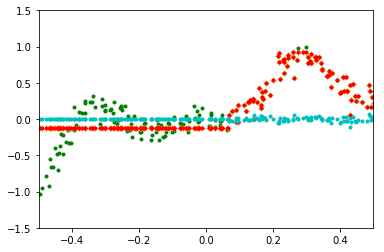

In [734]:
yout = net.forward(x_data_)
dy = tnn.MseLoss.del_loss(yout, y_data)
dx_ = net.backward(dy)

x_data_ = x_data_ - 0.03*dx_/hidden_size
yout_ = net.forward(x_data_)

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='+', c='orange', lw=1, label='x,y_out')
plt.scatter(x, yout_.reshape(-1), marker='.', c='r', lw=1, label='x,y_out_')
plt.scatter(x, (x_data-x_data_).reshape(-1), marker='.', c='c', lw=1, label='x,dx_')
# plt.scatter(x, (dx_).reshape(-1), marker='.', c='b', lw=1, label='x,dx')


plt.xlim((-0.5, 0.5))
plt.ylim((-1.5, 1.5))

In [726]:
xgrad = x_data-x_data_
xgrad.mean()

-0.0001254410184067902

### Using this type of relu on multilayer nn

In [753]:
hidden_size = 3
actf = tnn.Relu
# actf = ReluMasked1

optimizer = tnn.Adam(learning_rate=0.003)
layer1 = tnn.LinearLayer(1, hidden_size, optimizer=optimizer)
layer2 = actf()
layer3 = tnn.LinearLayer(hidden_size, hidden_size, optimizer=optimizer)
layer4 = actf()
layer5 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

net = tnn.AutoForm([layer1, layer2, layer3, layer4, layer5])

In [754]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    yout = net.forward(x_data)
    loss = tnn.MseLoss.loss(yout, y_data)
    dy = tnn.MseLoss.del_loss(yout, y_data)
    
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
#         plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(la2a.input.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
            
        print("Weight 1", '\n', la1a.weights)
        print("Weight 2", '\n', la2a.weights)
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.05047118626656056
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 100
Loss 0.034113350544711055
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 200
Loss 0.027779025785293943
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 300
Loss 0.023905282977202954
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 400
Loss 0.02168376930114694
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 500
Loss 0.018909027607820747
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 600
Loss 0.015145177562152341
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_________________



_______________________
epoch 5800
Loss 0.007081147744936375
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 5900
Loss 0.007081902643082399
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 6000
Loss 0.00708722859054272
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 6100
Loss 0.007084322287323374
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 6200
Loss 0.007086413561131136
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 6300
Loss 0.0070885622399874835
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 6400
Loss 0.007077794530605381
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


____



_______________________
epoch 11700
Loss 0.007060265737160966
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 11800
Loss 0.007062071996933146
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 11900
Loss 0.007060337792328803
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 12000
Loss 0.007060978561794316
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 12100
Loss 0.007059560475065412
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


_______________________
epoch 12200
Loss 0.007059577380340065
Weight 1 
 [[4.57969404 2.11322439]]
Weight 2 
 [[ 1.05741997]
 [-3.80393473]]


TclError: invalid command name "pyimage704"

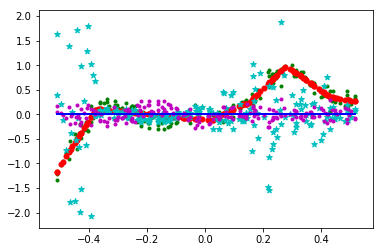

In [755]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,y_out')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)        

### Using this refined x-residual to predict the output if changed such

(-1.5, 1.5)

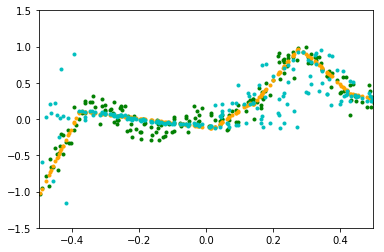

In [756]:
yout = net.forward(x_data)
dy = tnn.MseLoss.del_loss(yout, y_data)
dx = net.backward(dy)

yout_ = net.forward(x_data-dx/hidden_size)
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='orange', lw=1, label='x,y_out')
plt.scatter(x, yout_.reshape(-1), marker='.', c='c', lw=1, label='x,y_out_')
plt.xlim((-0.5, 0.5))
plt.ylim((-1.5, 1.5))

## Recursively reducing this false gradient

In [757]:
x_data_ = x_data

(-1.5, 1.5)

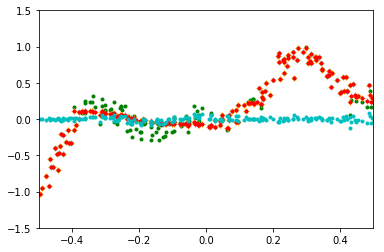

In [809]:
yout = net.forward(x_data_)
dy = tnn.MseLoss.del_loss(yout, y_data)
dx_ = net.backward(dy)

x_data_ = x_data_ - 0.03*dx_/hidden_size
yout_ = net.forward(x_data_)

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='+', c='orange', lw=1, label='x,y_out')
plt.scatter(x, yout_.reshape(-1), marker='.', c='r', lw=1, label='x,y_out_')
plt.scatter(x, (x_data-x_data_).reshape(-1), marker='.', c='c', lw=1, label='x,dx_')
# plt.scatter(x, (dx_).reshape(-1), marker='.', c='b', lw=1, label='x,dx')


plt.xlim((-0.5, 0.5))
plt.ylim((-1.5, 1.5))